In [2]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('train.csv')

In [3]:
# a. Overview of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# Frequency of Survived, Sex and Age columns.
for col in ['Survived', 'Sex', 'Age', ]:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for Survived:
 Survived
0    549
1    342
Name: count, dtype: int64

Value counts for Sex:
 Sex
male      577
female    314
Name: count, dtype: int64

Value counts for Age:
 Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


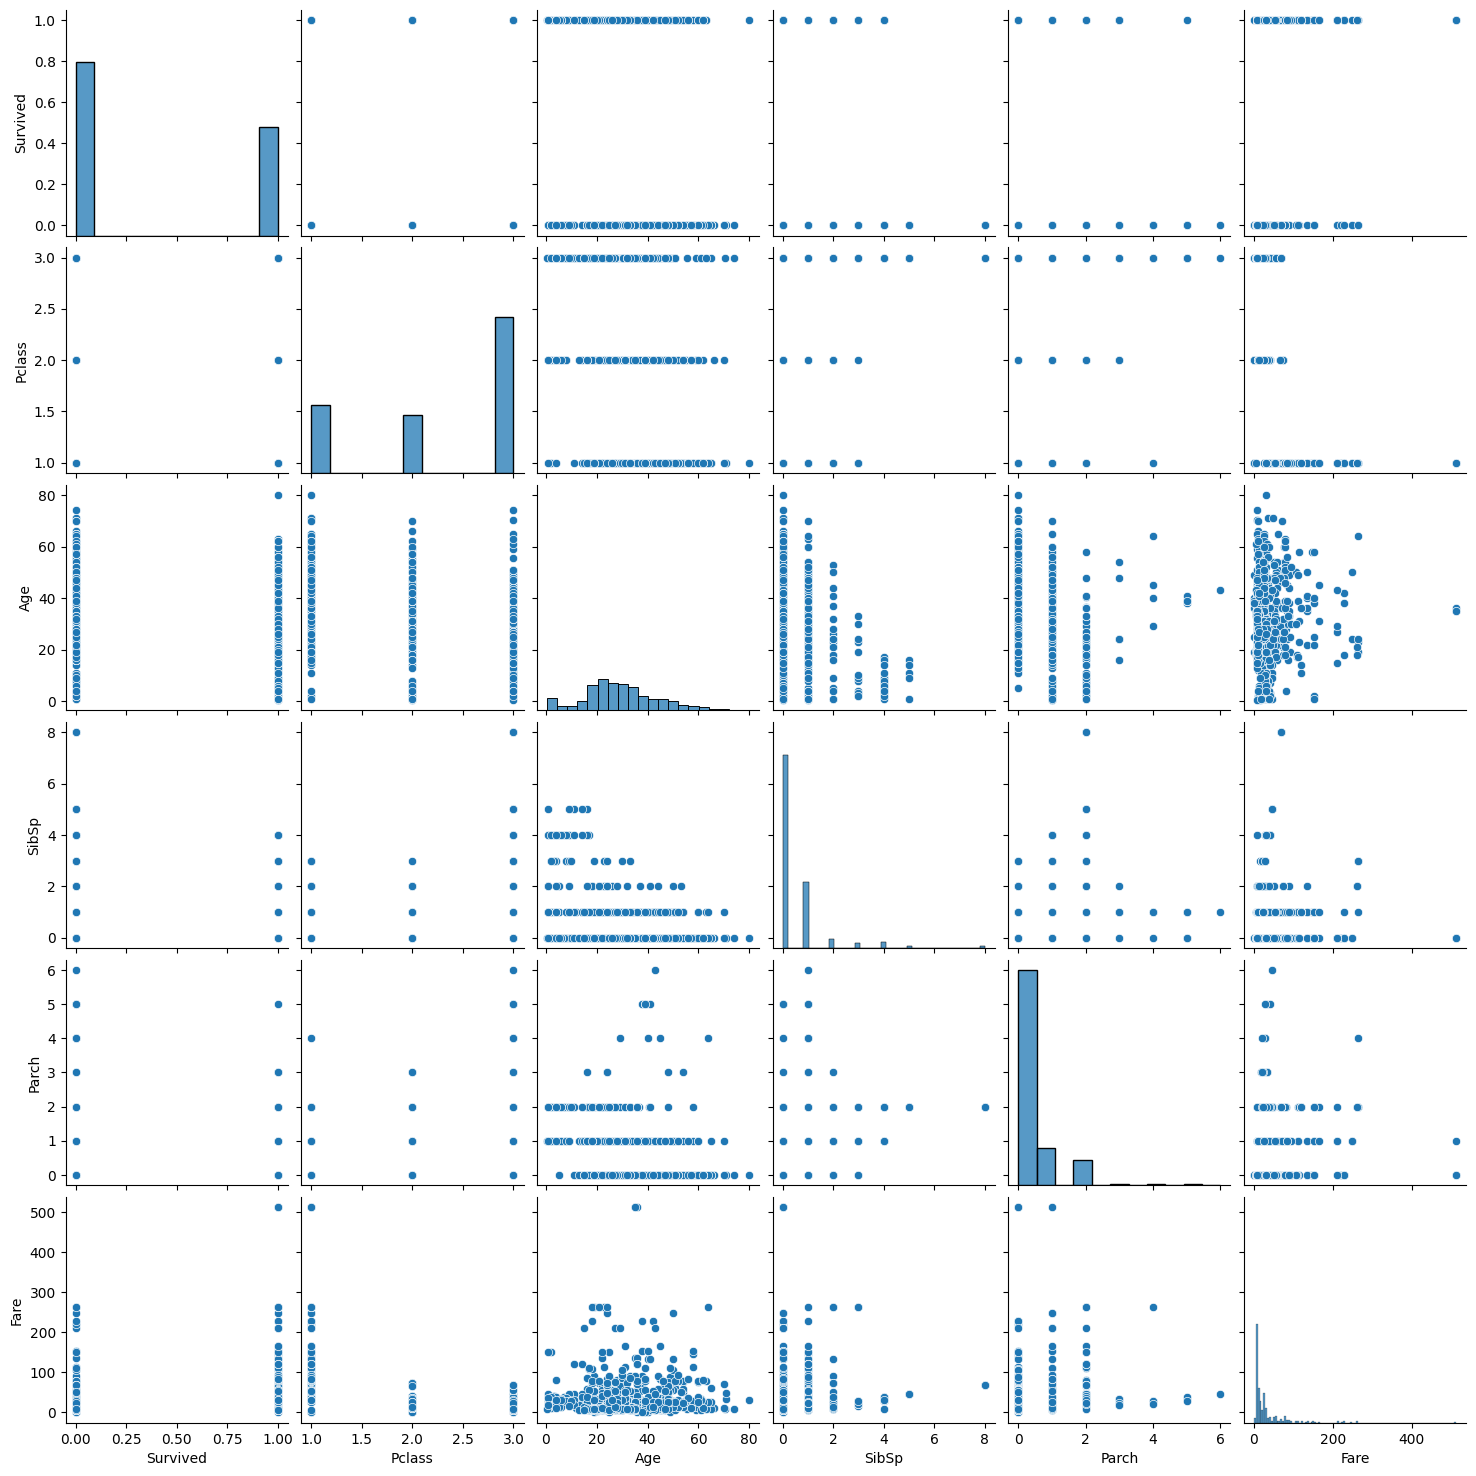

In [6]:
# Pair-Plot visualization for all the attributes
# Dropped PassengerId Column
df1 = df.iloc[: , 1:]

sns.pairplot(df1.select_dtypes(include=['float64', 'int64']))
plt.show()

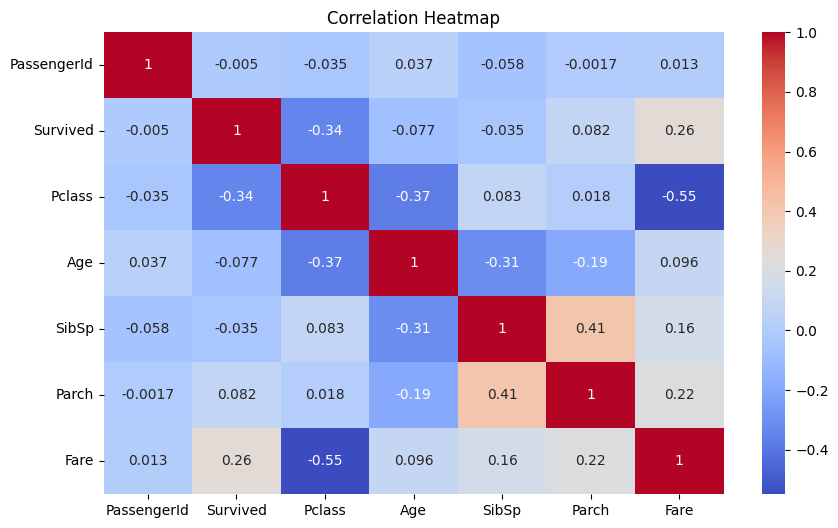

In [42]:
# Select only numeric columns
num_df = df.select_dtypes(include='number') ## Since corr() only works on numeric values... so we have take all the attributes except string ones


# Heatmap a.k.a Correlation Matrix
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

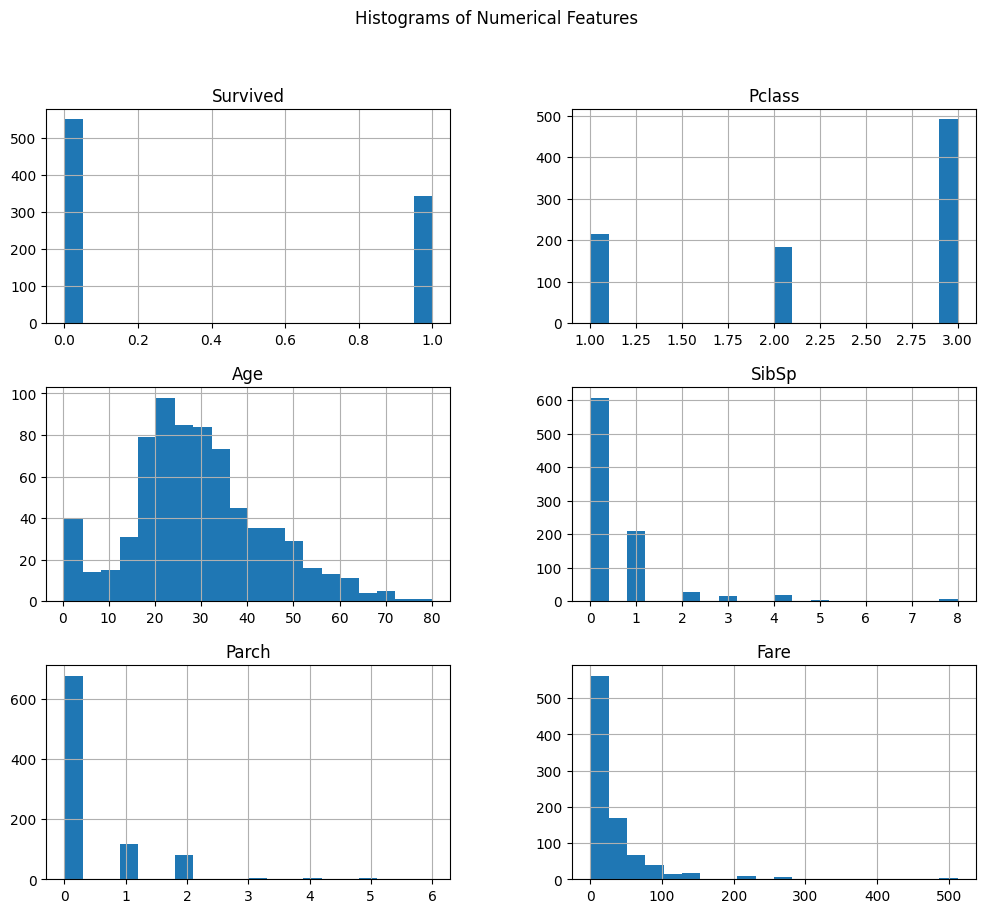

In [43]:
# Plot histograms, boxplots, scatterplots

## Histogram
df1.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

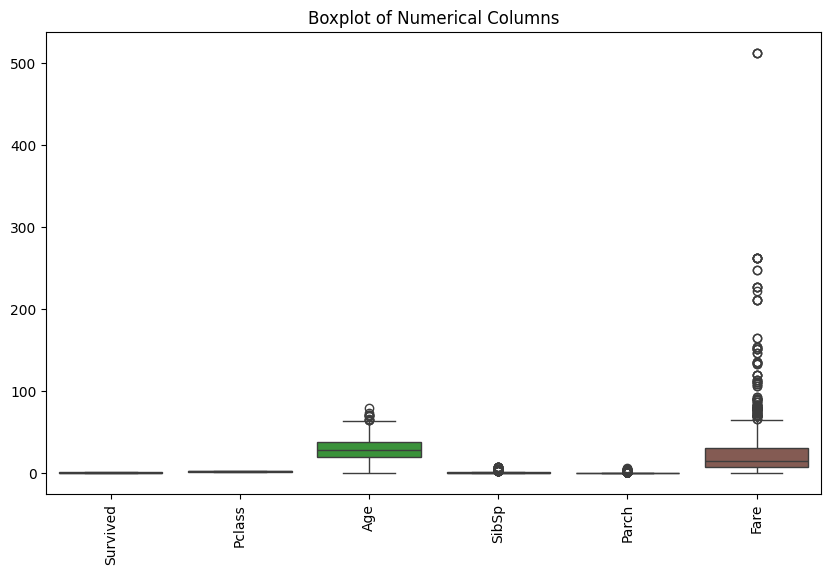

In [44]:
## Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Columns")
plt.show()

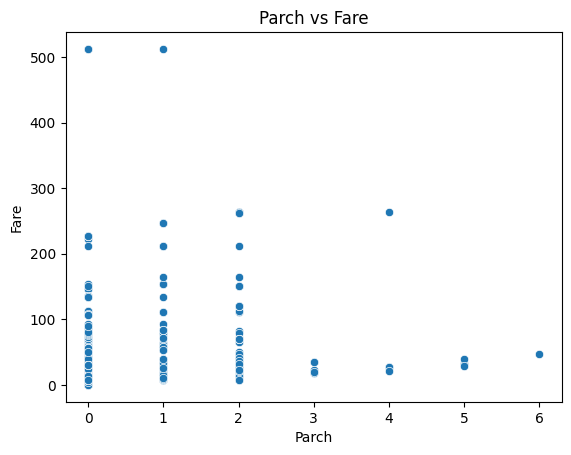

In [10]:
# Scatter plot between Cabin Vs. Fare
sns.scatterplot(x='Parch', y='Fare', data=df)
plt.title("Parch vs Fare")
plt.show()


In [ ]:
## OBSERVATIONS FOR EACH VISUAL

# Include simple insights after each plot like:
    # A. Pairplot: 
            # Survival is strongly related to Pclass — 1st class passengers were more likely to survive.
            # Age and survival show a slight pattern.
            # Fare correlates with both Pclass and survival — higher fares (1st class) had better chances.
            # Traveling alone (SibSp = 0, Parch = 0) was more common, but having family, there's a slight advatage for survival.
            # Data shows class and social status were critical factors in survival outcomes.
    # B. Heatmap: 
            # The red ones shows us that the attributes have positve correlation and blue ones have negative correlation. The whitish tone are the neutrals.
            # So from the fig., Pclass and Fare have negative high-correlation.      
    # C. Histogram: Parch is right-skewed.
    # D. Boxplot: Outliers found in Fare.
    # E. Scatterplot: 
            # Most passengers (Parch = 0) traveled without parents or children, making it the most frequent group.
            # Passengers with Parch ≥ 3 are rare and generally paid lower fares, possibly due to group discounts or lower-class accommodation.
            # There is no strong trend or linear correlation between Parch and Fare — other features like Pclass and Cabin likely influence fare more directly.

In [ ]:
## SUMMARY

    # Dataset contains 891 rows and 12 columns with no major missing values.
    # Outliers identified in Fare, consider normalization or removal.
    # Most variables are normally distributed, except for Parch (skewed).
    # Pclass and Fare have positive high correlation.

